# Text Classification

## Prediction

$y_i^\prime \leftarrow w_0 x_{i,0} + w_1 x_{i,1} + x_2 x_{i,2} + ... + w_n x_{i,n}$

In [7]:
def predict(weights, instance):
    score = 0
    for w, x in zip(weights, instance):
        score += w * x
    return 1 if score > 0 else 0

## Training

$w_j^\prime \leftarrow w_j + \alpha (y_i-y_i^\prime)x_{i,j}$ for all features $0 \leq j \leq n$.  

In [8]:
def train(instances, labels):
    alpha = 0.01
    weights = [0] * len(instances[0])
    for epoch in range(5):
        errors = 0
        for instance, y in zip(instances, labels):
            y_ = predict(weights, instance)
            # Update Weights
            for j in range(len(weights)):
                weights[j] += alpha * (y - y_) * instance[j]
            if y_ != y:
                errors += 1
        error_rate = errors / len(instances)
        print("Epoch: %d Error rate: %f" % (epoch, error_rate))
    return weights

## Use the model

In [9]:
labels = [0, 0, 0, 1, 1, 1]
instances = [[1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 2, 4], [1, 4, 2], [1, 3, 3]]

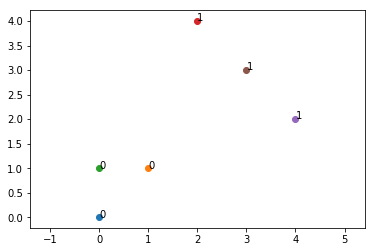

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(len(instances)):
    label = labels[i]
    x = instances[i][1]
    y = instances[i][2]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y))
plt.axis('equal');


In [11]:
weights = train(instances, labels)
print(weights)
print(predict(weights, [1, 0.5, 0.5]))
print(predict(weights, [1, 7, 5]))

Epoch: 0 Error rate: 0.166667
Epoch: 1 Error rate: 0.500000
Epoch: 2 Error rate: 0.333333
Epoch: 3 Error rate: 0.166667
Epoch: 4 Error rate: 0.166667
[-0.04, 0.019999999999999997, 0.009999999999999997]
0
1


## Prepare data

In [13]:
# import nltk
# nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer
from collections import Counter

def represent(doc):
    r = Counter()
    r['<b>'] = 1
    for tok in doc:
        if tok.isalpha():
            r[tok.lower()] += 1
    return r
    
print(movie_reviews.categories())

print(movie_reviews.fileids('pos'))

print(movie_reviews.words('pos/cv000_29590.txt'))

labels = []
instances = []

for label in movie_reviews.categories():
    for fileid in movie_reviews.fileids(label):
        doc = movie_reviews.words(fileid)
        if label == 'pos':
            labels.append(1)
        else:
            labels.append(0)
        instances.append(represent(doc))

print(labels[0])
print(instances[0])
feature_encoder = DictVectorizer()
instances = feature_encoder.fit_transform(instances).toarray()
print(instances[0])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jirlong/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
['neg', 'pos']
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt', 'pos/cv010_29198.txt', 'pos/cv011_12166.txt', 'pos/cv012_29576.txt', 'pos/cv013_10159.txt', 'pos/cv014_13924.txt', 'pos/cv015_29439.txt', 'pos/cv016_4659.txt', 'pos/cv017_22464.txt', 'pos/cv018_20137.txt', 'pos/cv019_14482.txt', 'pos/cv020_8825.txt', 'pos/cv021_15838.txt', 'pos/cv022_12864.txt', 'pos/cv023_12672.txt', 'pos/cv024_6778.txt', 'pos/cv025_3108.txt', 'pos/cv026_29325.txt', 'pos/cv027_25219.txt', 'pos/cv028_26746.txt', 'pos/cv029_18643.txt', 'pos/cv030_21593.txt', 'pos/cv031_18452.txt', 'pos/cv032_22550.txt', 'pos/cv033_24444.txt', 'pos/cv034_29647.txt', 'pos/cv035_3954.txt', 'pos/cv036_16831.t

In [14]:
weights = train(instances, labels)
print(predict(weights, instances[0]))

Epoch: 0 Error rate: 0.000500
Epoch: 1 Error rate: 0.002000
Epoch: 2 Error rate: 0.002000
Epoch: 3 Error rate: 0.001000
Epoch: 4 Error rate: 0.002000
1


## Evaluation

### Training data and test data      

In [145]:
import random

print(random.randint(1, 5))

4


In [146]:
training_instances = []
training_labels = []
test_instances = []
test_labels = []

for label in movie_reviews.categories():
    for fileid in movie_reviews.fileids(label):
        doc = movie_reviews.words(fileid)
        instance = represent(doc)
        if label == 'pos':
            lbl = 1
        else:
            lbl = 0
        if random.randint(0, 9) == 0:
            test_instances.append(instance)
            test_labels.append(lbl)
        else:
            training_instances.append(instance)
            training_labels.append(lbl)

print(len(training_instances))
print(len(training_labels))
print(len(test_instances))
print(len(test_labels))

1809
1809
191
191


In [147]:
feature_encoder = DictVectorizer()
training_instances = feature_encoder.fit_transform(training_instances).toarray()
test_instances = feature_encoder.transform(test_instances).toarray()

### Metrics

In [148]:
weights = train(training_instances, training_labels)

correct = 0
for instance, actual_label in zip(test_instances, test_labels):
    predict_label = predict(weights, instance)
    if predict_label == actual_label:
        correct += 1
print("Accuracy: %f" % (correct / len(test_instances)))

Epoch: 0 Error rate: 0.000553
Epoch: 1 Error rate: 0.002211
Epoch: 2 Error rate: 0.002211
Epoch: 3 Error rate: 0.001106
Epoch: 4 Error rate: 0.001658
Accuracy: 0.528796


#### Recall, Precision, and F-score

In [149]:
def evaluate(actual_labels, predict_labels):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for actual_label, predict_label in zip(actual_labels, predict_labels):
        if predict_label == 1 and actual_label == 1:
            tp += 1
        elif predict_label == 1 and actual_label == 0:
            fp += 1
        elif predict_label == 0 and actual_label == 1:
            fn += 1
        else:  # predict_label == 0 and actual_label == 0
            tn += 1
    accuracy = (tp + tn) / len(actual_labels)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fscore = (2.0 * recall * precision) / (recall + precision)
    return accuracy, precision, recall, fscore

In [150]:
predict_labels = []    
for instance in test_instances:
    predict_labels.append(predict(weights, instance))

accuracy, precision, recall, fscore = evaluate(test_labels, predict_labels)
print("Accuracy: %f Precision: %f Recall: %f F-score: %f" % (accuracy, precision, recall, fscore))

Accuracy: 0.528796 Precision: 0.531579 Recall: 0.990196 F-score: 0.691781


## Use off-the-shelf models

In [153]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(training_instances, training_labels)
predict_labels = model.predict(test_instances)

accuracy, precision, recall, fscore = evaluate(test_labels, predict_labels)
print("Accuracy: %f Precision: %f Recall: %f F-score: %f" % (accuracy, precision, recall, fscore))

Accuracy: 0.806283 Precision: 0.773109 Recall: 0.901961 F-score: 0.832579


In [154]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(training_instances, training_labels)
predict_labels = model.predict(test_instances)

accuracy, precision, recall, fscore = evaluate(test_labels, predict_labels)
print("Accuracy: %f Precision: %f Recall: %f F-score: %f" % (accuracy, precision, recall, fscore))

Accuracy: 0.832461 Precision: 0.897727 Recall: 0.774510 F-score: 0.831579


In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(training_instances, training_labels)
predict_labels = model.predict(test_instances)

accuracy, precision, recall, fscore = evaluate(test_labels, predict_labels)
print("Accuracy: %f Precision: %f Recall: %f F-score: %f" % (accuracy, precision, recall, fscore))

## Use Word Embeddings as Features

Load pre-trained word embedding

In [3]:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format("../text_mining_5/wiki.en.5k.vec", binary=False)
print("Number of words: %d" % len(w2v.vocab))

Number of words: 5000


In [4]:
import numpy

def we_represent(tokens):
    vec = numpy.zeros(300)
    for tok in tokens:
        if tok.lower() in w2v:
            vec += w2v[tok]
    return vec

In [6]:
training_instances = []
training_labels = []
test_instances = []
test_labels = []

for label in movie_reviews.categories():
    for fileid in movie_reviews.fileids(label):
        doc = movie_reviews.words(fileid)
        instance = we_represent(doc)
        if label == 'pos':
            lbl = 1
        else:
            lbl = 0
        if random.randint(0, 9) == 0:
            test_instances.append(instance)
            test_labels.append(lbl)
        else:
            training_instances.append(instance)
            training_labels.append(lbl)

print(len(training_instances))
print(len(training_labels))
print(len(test_instances))
print(len(test_labels))

NameError: name 'movie_reviews' is not defined

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(training_instances, training_labels)
predict_labels = model.predict(test_instances)

accuracy, precision, recall, fscore = evaluate(test_labels, predict_labels)
print("Accuracy: %f Precision: %f Recall: %f F-score: %f" % (accuracy, precision, recall, fscore))

Accuracy: 0.791209 Precision: 0.766667 Recall: 0.802326 F-score: 0.784091
